# **News Categorization using Multinomial Naive Bayes and Logistic Regression**

The dataset was taken from : https://www.kaggle.com/uciml/news-aggregator-dataset

This dataset contains headlines, URLs, and categories for 422,937 news stories collected by a web aggregator between March 10th, 2014 and August 10th, 2014.

News categories included in this dataset include business; science and technology; entertainment; and health. Different news articles that refer to the same news item (e.g., several articles about recently released employment statistics) are also categorized together.

# Content
The columns included in this dataset are:

**ID** : the numeric ID of the article

**TITLE** : the headline of the article

**URL** : the URL of the article

**PUBLISHER** : the publisher of the article

**CATEGORY** : the category of the news item; one of: -- b : business -- t : science and technology -- e : entertainment -- m : health

**STORY** : alphanumeric ID of the news story that the article discusses

**HOSTNAME** : hostname where the article was posted

**TIMESTAMP** : approximate timestamp of the article's publication, given in Unix time (seconds since midnight on Jan 1, 1970)

# Acknowledgments

This dataset comes from the UCI Machine Learning Repository. Any publications that use this data should cite the repository as follows:

Lichman, M. (2013). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

This specific dataset can be found in the UCI ML Repository at this URL

# Approach

We would be using the Multinomial Naive Bayes and Logistic Regression algorithms to categorize the news headlines

# Importing the data and the required libraries

In [1]:
#importing allthe necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfTransformer 
from sklearn.naive_bayes import MultinomialNB 
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline 
from sklearn import metrics
import itertools
%matplotlib inline

In [2]:
data=pd.read_csv("E:/Git/Project markdowns/Classifying news articles/uci-news-aggregator/uci-news-aggregator.csv")

In [3]:
#Analysing the structure of the data given to us
data.head(10)

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
0,1,"Fed official says weak data caused by weather,...",http://www.latimes.com/business/money/la-fi-mo...,Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,1394470370698
1,2,Fed's Charles Plosser sees high bar for change...,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,1394470371207
2,3,US open: Stocks fall after Fed official hints ...,http://www.ifamagazine.com/news/us-open-stocks...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371550
3,4,"Fed risks falling 'behind the curve', Charles ...",http://www.ifamagazine.com/news/fed-risks-fall...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371793
4,5,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,http://www.moneynews.com/Economy/federal-reser...,Moneynews,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com,1394470372027
5,6,Plosser: Fed May Have to Accelerate Tapering Pace,http://www.nasdaq.com/article/plosser-fed-may-...,NASDAQ,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.nasdaq.com,1394470372212
6,7,Fed's Plosser: Taper pace may be too slow,http://www.marketwatch.com/story/feds-plosser-...,MarketWatch,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.marketwatch.com,1394470372405
7,8,Fed's Plosser expects US unemployment to fall ...,http://www.fxstreet.com/news/forex-news/articl...,FXstreet.com,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.fxstreet.com,1394470372615
8,9,US jobs growth last month hit by weather:Fed P...,http://economictimes.indiatimes.com/news/inter...,Economic Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,economictimes.indiatimes.com,1394470372792
9,10,ECB unlikely to end sterilisation of SMP purch...,http://www.iii.co.uk/news-opinion/reuters/news...,Interactive Investor,b,dPhGU51DcrolUIMxbRm0InaHGA2XM,www.iii.co.uk,1394470501265


In [4]:
#Getting the counts of each category
data["CATEGORY"].value_counts()

e    152469
b    115967
t    108344
m     45639
Name: CATEGORY, dtype: int64

In [5]:
names=['Entertainment', 'Business', 'Science and Technology', 'Health']

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000227F372B320>], dtype=object)

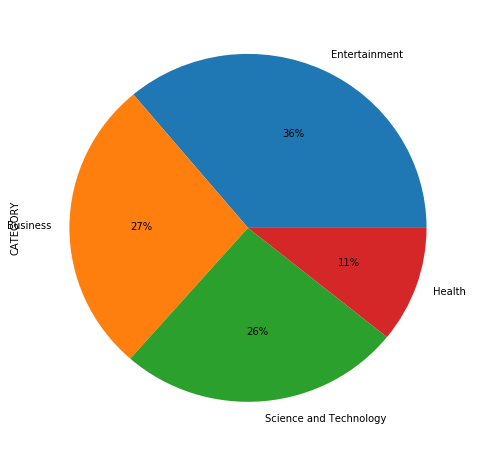

In [6]:
#visualizing the categories 
data["CATEGORY"].value_counts().plot(kind='pie', labels=names, autopct='%1.0f%%', subplots=True, figsize=(8, 8))

# Preparing the data to be fed into the model

We will split the original data into the training and testing sets using the train_test_split() function. We want a training size of 70% of the entire data. 

It is worth noting that the train_test_split() function shuffles the rows inorder to maintain the training set distribution similar to the original data.

In [7]:
X=data["TITLE"]
y=data["CATEGORY"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
#Calculating the number of rows in our train set
len(y_train)

295693

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000227F3748CF8>], dtype=object)

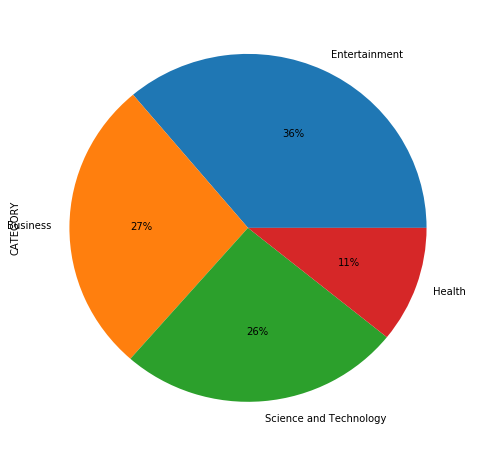

In [9]:
y_train.value_counts().plot(kind='pie', labels=names, autopct='%1.0f%%', subplots=True, figsize=(8, 8))

We see that the training set has the same distribution as the original data and that's what we wanted.

# Training the Multinomial Naive Bayes Classifier

In order to train and test the classifier, the first step should be to tokenize and count the number of occurrence of each word that appear in the headlines.

We use the CountVectorizer() for that. Each term is assigned a unique integer index. 

Then the counters are transformed to a TF-IDF representation using TfidfTransformer(). 

The last step creates the Multinomial Naive Bayes classifier. 

In order to make the training process easier, scikit-learn provides a Pipeline class that behaves like a compound classifier. 

In [10]:
text_clf = Pipeline([('vect', CountVectorizer()),
                         ('tfidf', TfidfTransformer()),
                         ('clf', MultinomialNB()),
                         ])

In [11]:
text_clf = text_clf.fit(X_train, y_train)
predicted1 = text_clf.predict(X_test)

In [12]:
metrics.accuracy_score(y_test, predicted1)

0.92273093130060124

In [13]:
print(metrics.classification_report(y_test, predicted1, target_names=sorted(names)))

                        precision    recall  f1-score   support

              Business       0.89      0.91      0.90     34868
         Entertainment       0.95      0.97      0.96     45630
                Health       0.97      0.84      0.90     13658
Science and Technology       0.90      0.90      0.90     32570

           avg / total       0.92      0.92      0.92    126726



We can see that the metrics (precision, recall and f1-score) on an average give us 0.92, the results for category e (entertainment) are even better.

The overall accuracy of classification is 92.273%

# Training the Logistic Regression Classifier

In order to train and test the classifier, the first step should be to tokenize and count the number of occurrence of each word that appear in the headlines.

We use the CountVectorizer() for that. Each term is assigned a unique integer index.

Then the counters are transformed to a TF-IDF representation using TfidfTransformer().

The last step creates the Logistic Regression classifier. It is worth noting that the default mode for the LogisticRegression() function can only help us classify binary target variables. In order to be able to classify a multi-class problem, we specify **multi_class='multinomial'**. Also worth noting is that the only solvers that can be used for a multiclass problem are: **newton-cg, sag & lbfgs** which are specified using the **solver=...** parameter in the LogisticRegression() function.

In order to make the training process easier, scikit-learn provides a Pipeline class that behaves like a compound classifier.

In [14]:
text_np = Pipeline([('vect', CountVectorizer()),
                         ('tfidf', TfidfTransformer()),
                         ('clf2', LogisticRegression(solver='newton-cg', multi_class='multinomial')),
                         ])

In [15]:
text_np = text_np.fit(X_train, y_train)
predicted2 = text_np.predict(X_test)

In [16]:
metrics.accuracy_score(y_test, predicted2)

0.94406041380616446

In [17]:
print(metrics.classification_report(y_test, predicted2, target_names=sorted(names)))

                        precision    recall  f1-score   support

              Business       0.92      0.93      0.92     34868
         Entertainment       0.97      0.98      0.97     45630
                Health       0.96      0.91      0.94     13658
Science and Technology       0.93      0.93      0.93     32570

           avg / total       0.94      0.94      0.94    126726



The accuracy with the Logistic Regression model is better than with the Naive Bayes model. Also, we see the average f-score is 0.94 which is betterthan the 9.2 in the case of the Naive Bayes classifier.

# **Conclusion**

A Naive Bayes method is slightly faster but the Logistic Regression model has a higher classification accuracy.

This difference arises because they optimize different objective functions even though both the algorithms utilize the same hypothesis space.

When the training size reaches infinity the discriminative model: logistic regression performs better than the generative model Naive Bayes. However the generative model reaches its asymptotic faster than the discriminative model, i.e the generative model (Naive Bayes) reaches the asymptotic solution for fewer training sets than the discriminative model (Logistic Regression). The training set size seems to be large enough for the logistic regression to be better. The other reason could also be that the data isn't entirely conditionally independent (which is required by the Naive Bayes model).